<h1>Lab 1</h1>

In [128]:
from sklearn import datasets, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

<h3>Loading and splitting the data set</h3>

In [129]:
digits = datasets.load_digits()
dataset_size = len(digits.data)
train_size = int(0.7*dataset_size)

train_features, train_labels = digits.data[:train_size], digits.target[:train_size]
train_images = digits.images[:train_size]
test_features, test_labels = digits.data[train_size:], digits.target[train_size:]
test_images = digits.images[train_size:]

<h2>k-NN Classifier</h2>

<h3>Training the model</h3>

In [130]:
classifier = KNeighborsClassifier(n_neighbors=5, algorithm='brute')
classifier.fit(train_features, train_labels)

KNeighborsClassifier(algorithm='brute')

<h3>Predicting the test set</h3>

In [131]:
predicted_labels = classifier.predict(test_features)

<h3>Visualizing the test prediction</h3>

Firstly, we extract the corresponding distances and indicies for 5 neighbors of each data point.

In [132]:
distances, neighbors = classifier.kneighbors(test_features)

The 5 closest distances and neighbors are as follows.
In the second matrix, the first row states the 5 closest neighbors of the first data point in the test set. So, the indices of the 5 data points closest to the first test data point are: 353, 817, 297, 366 and 1254.

In [133]:
print(distances[:5])
print(neighbors[:5])

[[11.66190379 16.94107435 18.16590212 19.31320792 20.19900988]
 [21.09502311 21.47091055 21.61018278 21.74856317 21.81742423]
 [18.02775638 18.1934054  19.62141687 21.16601049 21.9317122 ]
 [10.95445115 17.60681686 19.74841766 22.58317958 23.13006701]
 [12.9614814  13.41640786 14.79864859 15.32970972 16.40121947]]
[[ 353  817  297  366 1254]
 [1177  588  725  824  328]
 [ 376  791  801  165  896]
 [1240   91  175 1246   23]
 [ 522 1223  611  620   65]]


Plotting the 5 nearest neighboring images of the 5 first data points.

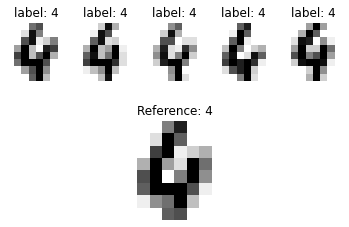

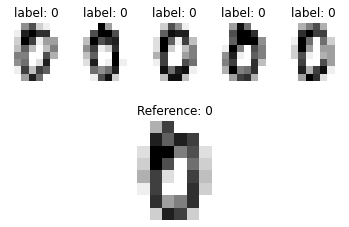

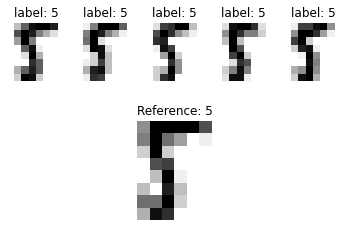

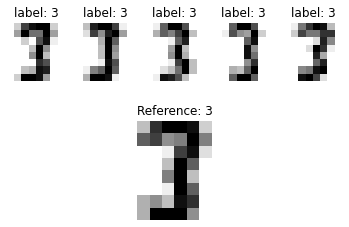

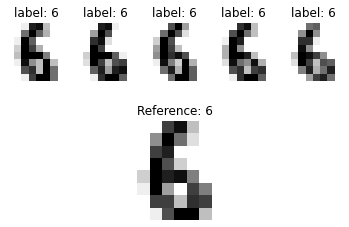

In [134]:
for digit_reference_image_index in range(5):
    plt.subplots(2)

    plt.axis('off')
    plt.imshow(test_images[digit_reference_image_index], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Reference: ' + str(test_labels[digit_reference_image_index]))

    closest_reference_neighbors = neighbors[digit_reference_image_index]
    
    for i in range(5):
        close_neighbor = closest_reference_neighbors[i]
        image = train_images[close_neighbor]
        label = train_labels[close_neighbor]
        plt.subplot(2, 5, i+1)
        plt.axis('off')
        plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('label: ' + str(label))


<h3>Evaluating the model</h3>

In [135]:
print(metrics.classification_report(test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.95      0.98      0.96        53
           2       0.98      0.96      0.97        53
           3       0.96      0.92      0.94        53
           4       0.98      0.96      0.97        57
           5       0.95      0.98      0.96        56
           6       0.98      1.00      0.99        54
           7       0.95      1.00      0.97        54
           8       0.96      0.90      0.93        52
           9       0.96      0.95      0.95        55

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.97      0.96      0.96       540



In [136]:
metrics.confusion_matrix( test_labels, predicted_labels)

array([[52,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 52,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 1,  0, 51,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 49,  0,  1,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 55,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0, 55,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 54,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  1, 47,  1],
       [ 0,  0,  0,  1,  0,  2,  0,  0,  0, 52]], dtype=int64)

<h2>k-Means</h2>

In [137]:
from sklearn.cluster import KMeans
import numpy as np

Initializing the classifier.

In [138]:
cluster = KMeans(n_clusters=10)

Train the model.

In [139]:
clusters = cluster.fit(train_features)

The cluster centers represent the average of all images in the cluster. The cluster center is a matrix in as many dimensions as there are pixels in an image.
By splitting the array representing the cluster center into smaller arrays of length 8, and arranging them to a matrix we recreate the average image of the cluster.

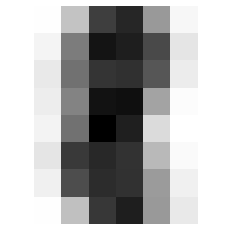

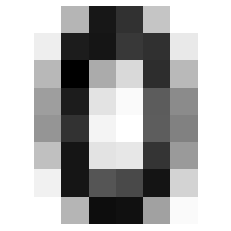

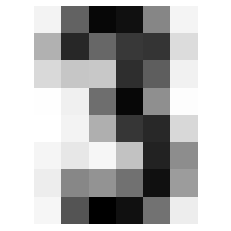

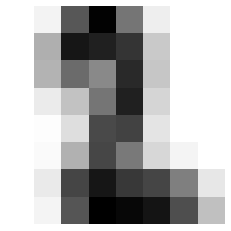

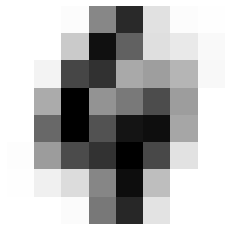

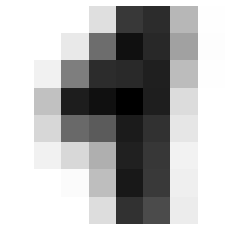

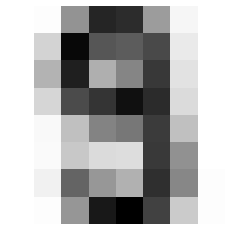

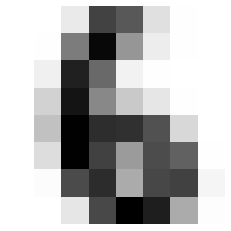

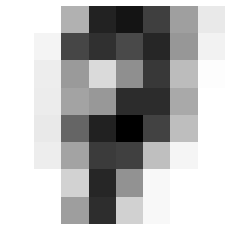

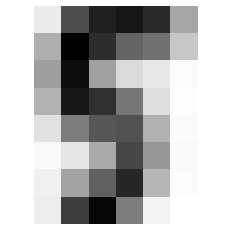

In [140]:
for i in range(10):
    center_array = clusters.cluster_centers_[i]
    center_matrix = np.split(center_array, 8)
    plt.axis('off')
    plt.imshow(center_matrix, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

Let's classify our data.

In [141]:
predicted = cluster.predict(test_features)